# Stock Analysis Project

## Overview

This project aims to analyze the stock performance and financial metrics of various companies. We specifically focus on two performance indicators - Earnings Per Share (EPS) and end-of-year stock prices. The objective is to understand the correlation, if any, between these two metrics. Another aim of the project is to demonstrate knowledge of data collection, cleaning and building a simple predictive model using linear regression.

## Data Sources

- **EPS Data:** Obtained from https://datajockey.io
- **Stock Prices:** Fetched using the `yfinance` library for historical stock prices.

## Metrics Analyzed

1. **Earnings Per Share (EPS)**: Represents the portion of a company's profit allocated to each outstanding share of common stock. It serves as an indicator of a company's profitability.

2. **End-of-Year Stock Prices**: These are the stock prices at the end of each year, serving as a snapshot of the company's market performance.

## Steps

1. **Data Collection**: Fetch the financial metrics and stock prices.</br></br>
    1a. **Collecting EPS Data**: Collecting EPS data.</br>
    1b. **Cleaning EPS Data**: Process the data for analysis.</br>
    1a. **Collecting Stock Price Data**: Collecting Stock Price Data from yfinance.</br>
    1a. **Cleaning Stock Price Data**: Process the data for analysis.</br></br>
2. **Data Analysis**: Compute correlations and other statistical measures.</br>
4. **Predictive Modelling**: Use Linear Regression to build a predictive model.</br>

## Tools Used

- Python
- Pandas for data manipulation
- yfinance for fetching stock data
- matplotlib for plotting data
- scikit learn for implementing models


## Author

Kabir Inaganti



 ## Step 1: Data Collection

In [3]:
#importing libraries
import requests
import json
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1a: Collecting EPS data 

In [6]:
# Initialize an empty dictionary to store financial data for multiple stocks
all_stock_data = {}

# List of tech stock tickers
stock_list = ['AAPL', 'IBM', 'MSFT', 'AMZN', 'JNJ']
period='A'
# Loop through each stock ticker in the list
for ticker in stock_list:
    # Define the API endpoint
    endpoint = f"https://api.datajockey.io/v0/company/financials?ticker={ticker}&apikey={api_key}&period={period}"
    
    # Make the API request
    response = requests.get(endpoint)
    data = response.json()
    
    # Save the data to the dictionary
    all_stock_data[ticker] = data


In [14]:
# Now, all_stock_data contains the financial data for all the stocks in stock_list. We need to extract EPS data from this.
#all_stock_data

In [7]:
# Initialize an empty dictionary to store EPS data for multiple stocks
all_eps_data = {}

# Loop through each stock ticker in the list
for ticker in stock_list:
    # Fetch the data from the all_stock_data dictionary
    stock_data = all_stock_data.get(ticker, {})
    
    # Navigate through the JSON structure to get to the EPS data
    try:
        eps_data = stock_data['financial_data']['annual']['eps_diluted']
    except KeyError:
        print(f"EPS data not found for {ticker}")
        continue
    
    # Save the EPS data to the new dictionary
    all_eps_data[ticker] = eps_data

# Now, all_eps_data contains just the EPS data for all the stocks in stock_list


In [8]:
#Save the data into a file
with open('eps_data.json', 'w') as f:
    json.dump(all_eps_data, f)

In [9]:
# Convert the dictionary to a DataFrame
eps_df = pd.DataFrame.from_dict(all_eps_data, orient='index')

# Show the DataFrame
print(eps_df)

      2007  2008   2009   2010   2011   2012   2013   2014   2015   2016  \
AAPL  0.14  0.24   0.32   0.54   0.99   1.58   1.42   1.61   2.30   2.08   
IBM   7.15  8.89  10.01  11.52  13.06  14.37  14.94  11.90  13.42  12.38   
AMZN  0.06  0.07   0.10   0.13   0.07   0.00   0.03  -0.03   0.06   0.24   
JNJ   3.63  4.57   4.40   4.78   3.49   3.86   4.81   5.70   5.48   5.93   
MSFT   NaN  1.87   1.62   2.10   2.69   2.00   2.58   2.63   1.48   2.56   

      2017  2018   2019  2020  2021  2022  2023  
AAPL  2.30  2.98   2.97  3.28  5.61  6.11   NaN  
IBM   6.14  9.53  10.56  6.23  6.35  1.80   NaN  
AMZN  0.31  1.01   1.15  2.09  3.24 -0.27   NaN  
JNJ   0.47  5.61   5.63  5.51  7.81  6.73   NaN  
MSFT  3.25  2.13   5.06  5.76  8.05  9.65  9.68  


### 1b: Cleaning EPS data 

In [10]:
#Cleaning up the data frame by dropping columns which nave NaN values

eps_df_cleaned = eps_df.dropna(axis=1)

# Display the DataFrame after dropping columns with NaN values

print("\nDataFrame after dropping columns with NaN values:\n")

print(eps_df_cleaned)


DataFrame after dropping columns with NaN values:

      2008   2009   2010   2011   2012   2013   2014   2015   2016  2017  \
AAPL  0.24   0.32   0.54   0.99   1.58   1.42   1.61   2.30   2.08  2.30   
IBM   8.89  10.01  11.52  13.06  14.37  14.94  11.90  13.42  12.38  6.14   
AMZN  0.07   0.10   0.13   0.07   0.00   0.03  -0.03   0.06   0.24  0.31   
JNJ   4.57   4.40   4.78   3.49   3.86   4.81   5.70   5.48   5.93  0.47   
MSFT  1.87   1.62   2.10   2.69   2.00   2.58   2.63   1.48   2.56  3.25   

      2018   2019  2020  2021  2022  
AAPL  2.98   2.97  3.28  5.61  6.11  
IBM   9.53  10.56  6.23  6.35  1.80  
AMZN  1.01   1.15  2.09  3.24 -0.27  
JNJ   5.61   5.63  5.51  7.81  6.73  
MSFT  2.13   5.06  5.76  8.05  9.65  


In [17]:
#Save data into a file

csv_path="eps_data_cleaned.csv"
eps_df_cleaned.to_csv(csv_path)
# import os
# print(os.getcwd())


In [19]:
eps_df_cleaned_saved=pd.read_csv(csv_path,index_col=0)
eps_df_cleaned_saved.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,0.24,0.32,0.54,0.99,1.58,1.42,1.61,2.30,2.08,2.30,2.98,2.97,3.28,5.61,6.11
IBM,8.89,10.01,11.52,13.06,14.37,14.94,11.90,13.42,12.38,6.14,9.53,10.56,6.23,6.35,1.80
AMZN,0.07,0.10,0.13,0.07,0.00,0.03,-0.03,0.06,0.24,0.31,1.01,1.15,2.09,3.24,-0.27
JNJ,4.57,4.40,4.78,3.49,3.86,4.81,5.70,5.48,5.93,0.47,5.61,5.63,5.51,7.81,6.73
MSFT,1.87,1.62,2.10,2.69,2.00,2.58,2.63,1.48,2.56,3.25,2.13,5.06,5.76,8.05,9.65


### 1c: Collecting Stock Price Data

In [20]:
def fetch_stock_price(ticker, dates):
    stock_data = yf.download(ticker, start=min(dates), end=max(dates))
    # Find the closest available dates
    closest_indices = stock_data.index.get_indexer(dates, method='nearest')
    annual_data = stock_data.iloc[closest_indices]
    return list(annual_data['Close'])

# Initialize an empty dictionary to store stock prices for multiple stocks
all_stock_prices = {}

# # Your list of stock tickers
# stock_list = ['AAPL', 'IBM', 'MSFT', 'AMZN', 'JNJ']

# Dates for which you want to fetch stock prices
dates = [ '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31','2022-12-31']

# Loop through each stock ticker in the list
for ticker in stock_list:
    stock_prices = fetch_stock_price(ticker, dates)
    all_stock_prices[ticker] = stock_prices

# Convert the all_stock_prices dictionary to a DataFrame
df_stock_prices = pd.DataFrame.from_dict(all_stock_prices, orient='index')

# Now, df_stock_prices contains the stock prices for all the stocks in stock_list for the given dates.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### 1b: Cleaning Stock Prices Data

In [21]:
# Extract the years from the dates
dates_as_years = [date.split('-')[0] for date in dates]

# Rename the columns of df_stock_prices
df_stock_prices.columns = dates_as_years


In [22]:
df_stock_prices.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,3.048214,7.526071,11.520000,14.464286,19.006071,20.036428,27.594999,26.315001,28.955000,43.064999,39.435001,73.412498,132.690002,177.570007,129.929993
IBM,80.458893,125.143402,140.305923,175.793503,183.126190,179.321228,153.384323,131.567871,158.690247,147.466537,108.671127,128.145309,120.344170,133.660004,140.889999
MSFT,19.440001,30.480000,27.910000,25.959999,26.709999,37.410000,46.450001,55.480000,62.139999,85.949997,101.570000,157.699997,222.419998,336.320007,239.820007
AMZN,2.564000,6.726000,9.000000,8.655000,12.543500,19.939501,15.517500,33.794498,37.493500,59.450500,75.098503,92.391998,162.846497,166.716995,84.000000
JNJ,59.830002,64.410004,61.849998,65.580002,70.099998,91.589996,104.570000,102.720001,115.209999,139.229996,129.050003,145.869995,157.380005,171.070007,176.649994


## 2 Data Analysis

In [24]:
pe_ratio_df = df_stock_prices / eps_df_cleaned_saved
pe_ratio_df.replace([np.inf, -np.inf], np.nan, inplace=True)

pe_ratio_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,12.700891,23.518972,21.333334,14.610390,12.029159,14.110161,17.139751,11.441305,13.920673,18.723912,13.233222,24.718013,40.454269,31.652408,21.265138
AMZN,36.628570,67.259998,69.230769,123.642853,NaN,664.650027,-517.249997,563.241641,156.222916,191.775808,74.354954,80.340868,77.916984,51.455863,-311.111111
IBM,9.050494,12.501838,12.179334,13.460452,12.743646,12.002760,12.889439,9.803865,12.818275,24.017351,11.403056,12.134972,19.316881,21.048819,78.272222
JNJ,13.091904,14.638637,12.939330,18.790831,18.160621,19.041579,18.345614,18.744526,19.428330,296.234033,23.003566,25.909413,28.562614,21.903970,26.248142
MSFT,10.395722,18.814815,13.290476,9.650557,13.355000,14.500000,17.661597,37.486486,24.273437,26.446153,47.685446,31.166007,38.614583,41.778883,24.851814


In [25]:

# Calculate the correlation between P/E ratios and stock prices for each company
correlation_df = pd.DataFrame(index=df_stock_prices.index, columns=['Correlation'])
for company in df_stock_prices.index:
    correlation_df.loc[company, 'Correlation'] = df_stock_prices.loc[company].corr(pe_ratio_df.loc[company])

correlation_df


,Correlation
AAPL,0.75394
IBM,0.033189
MSFT,0.658194
AMZN,-0.102974
JNJ,0.248835


<h3>Interpretation:</h3>

<h4>Positive Correlation:</h4> A positive value indicates that as one variable increases, the other also tends to increase. AAPL, IBM, MSFT, and JNJ show positive correlations, with MSFT having the highest correlation of 0.6580.658.

<h4>Negative Correlation:</h4> A negative value indicates that as one variable increases, the other tends to decrease. AMZN shows a slight negative correlation.

<h4>Near Zero:</h4> A correlation near zero suggests little to no relationship between the variables. IBM's correlation is very close to zero.
    
Given these correlations, it seems like MSFT has the strongest positive correlation between stock price and P/E ratio, followed by AAPL.

## 3 Preditive Modelling

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
##Extract data concerning AAPL from the stock price and EPS data frames and then merging them.

apple_eps =  eps_df_cleaned_saved.loc['AAPL']

apple_stock_prices = df_stock_prices.loc['AAPL']

# Create a merged DataFrame for the linear regression model

apple_data = pd.DataFrame({

    'EPS': apple_eps,

    'Stock_Price': apple_stock_prices

})
apple_data

,EPS,Stock_Price
2008,0.24,3.048214
2009,0.32,7.526071
2010,0.54,11.520000
2011,0.99,14.464286
2012,1.58,19.006071
2013,1.42,20.036428
2014,1.61,27.594999
2015,2.30,26.315001
2016,2.08,28.955000
2017,2.30,43.064999


In [45]:
# Split the data into training and testing sets

X = apple_data[['EPS']]  # Features (independent variables)

y = apple_data['Stock_Price']  # Target variable (dependent variable)



# Split the data - 80% for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the Linear Regression model

model = LinearRegression()



# Fit the model on the training data

model.fit(X_train, y_train)



# Make predictions on the test data

y_pred = model.predict(X_test)

apple_data['Predicted_Stock_Price'] = model.predict(X)

# Calculate the performance metrics

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)



# Coefficients

coef = model.coef_

intercept = model.intercept_

print(f"Root Mean Square Error is: ${mse}")
print(f"Coefficient Of Determination is: ${r2}")
print(f"Model's Coefficient: ${coef}")



Root Mean Square Error is: $68.40673932795583
Coefficient Of Determination is: $0.9176202482566425
Model's Coefficient: $[28.51446171]


<h3>Interpretation:</h3>

<h4>Root Mean Square Error:</h4>The mean squared error (MSE) of the model's predictions is approximately 68.41. This value quantifies the average squared difference between the actual and predicted stock prices, with a lower value indicating a better fit.

<h4>Coefficient Of Determination:</h4> The coefficient of determination, or R2R2 score, is approximately 0.91. This score ranges from 0 to 1, with 1 meaning the model perfectly predicts the target variable. An R2R2 score of 0.91 suggests that the model explains a significant portion of the variance in the stock price..

<h4>Model's Coefficient:</h4> The model's coefficient for EPS is approximately 28.51. This value indicates that for each unit increase in EPS, the stock price is expected to increase by roughly 28.51 units, all else being equal.
    


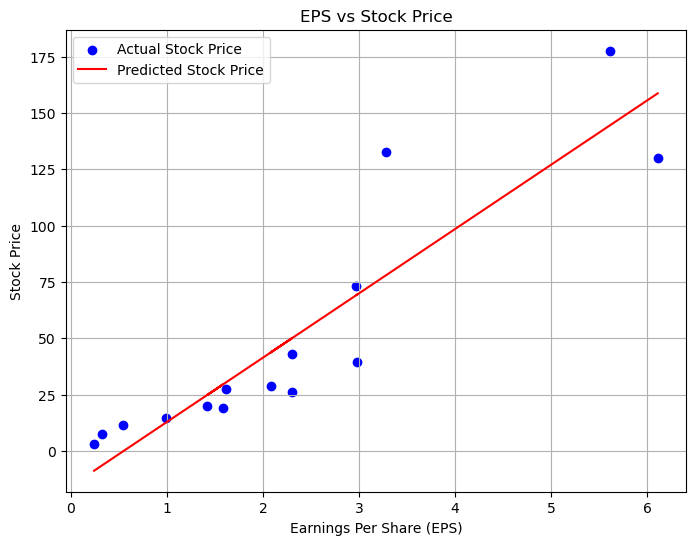

In [56]:
plt.figure(figsize=(8, 6))

plt.scatter(apple_data['EPS'], apple_data['Stock_Price'], color='blue', label='Actual Stock Price')
plt.plot(apple_data['EPS'], apple_data['Predicted_Stock_Price'], color='red', label='Predicted Stock Price')
plt.title('EPS vs Stock Price')
plt.xlabel('Earnings Per Share (EPS)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

<h3>Interpretation:</h3>

The scatter plot shows the actual stock prices (in blue) against the earnings per share (EPS) for each year. The red line represents the predicted stock prices based on the EPS data, as modeled by our linear regression.

The linear regression model attempts to draw a straight line that best fits the data points and can be used to predict the stock price given the EPS value. This line is the result of minimizing the distance between each data point and the line itself (the error).

From the graph, we can observe that there is a general trend where the stock price increases as the EPS increases, which is consistent with what one might expect: as a company's earnings per share grow, its stock price also tends to rise, reflecting the company's improved profitability. However, there are some deviations from this trend, indicating that factors other than EPS also significantly influence the stock price.​​